In [2]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
import pandas_profiling
warnings.filterwarnings("ignore")
print()

In [3]:
data_frame = pd.read_csv("data.csv")
print(data_frame.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [7]:
data_frame = data_frame.dropna(axis=1)

In [ ]:
# Make a report
profile = data_frame.profile_report(title = "Report_for_data")
profile.to_file(output_file="Report_for_data.html")

In [9]:
from sklearn.model_selection import train_test_split
y = data_frame.diagnosis
feature = []
for i in data_frame.columns:
    if i != "diagnosis" and i != "id":
        feature.append(i)
x = data_frame[feature]
data_model = SVC()


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [11]:
# Split data
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size=0.33 , random_state=42)
pred_train = data_model.fit(x_train,y_train)
true_train = data_model.predict(x_train)
print("Confusion Matrix on train data: ", confusion_matrix(true_train , y_train , labels=['M','B']))
print("Accuracy on train data: ", accuracy_score(true_train , y_train))

Confusion Matrix on train data:  [[115   6]
 [ 30 230]]
Accuracy on train data:  0.905511811023622


In [13]:
true_test = pred_train.predict(x_test)
print("Confusion Matrix on train data: ", confusion_matrix(true_test , y_test , labels=['M','B']))
print("Accuracy on train data: ", accuracy_score(true_test , y_test))

Confusion Matrix on train data:  [[ 59   1]
 [  8 120]]
Accuracy on train data:  0.9521276595744681


In [14]:
# Check Overfitting

train_score , test_score = list(), list()

# Run through dept tree
value = [i for i in range(1,100)]
for i in value:
    # configure models
    model = SVC(max_iter=i)
    # fit model on training data set
    model.fit(x_train,y_train)
    #evaluate on training data set
    train_true_1 = model.predict(x_train)
    train_accuracy = accuracy_score(y_train,train_true_1)
    train_score.append(train_accuracy)

    # evaluate on testing data set

    test_true_1 = model.predict(x_test)
    test_accuracy_1 = accuracy_score(y_test,test_true_1)
    test_score.append(test_accuracy_1)

    # Print summarize process
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy , test_accuracy_1))


>1, train: 0.310, test: 0.303
>2, train: 0.622, test: 0.638
>3, train: 0.617, test: 0.622
>4, train: 0.696, test: 0.681
>5, train: 0.753, test: 0.745
>6, train: 0.756, test: 0.745
>7, train: 0.745, test: 0.723
>8, train: 0.606, test: 0.612
>9, train: 0.646, test: 0.622
>10, train: 0.675, test: 0.665
>11, train: 0.596, test: 0.596
>12, train: 0.570, test: 0.574
>13, train: 0.472, test: 0.463
>14, train: 0.415, test: 0.431
>15, train: 0.373, test: 0.378
>16, train: 0.354, test: 0.346
>17, train: 0.344, test: 0.351
>18, train: 0.257, test: 0.250
>19, train: 0.252, test: 0.255
>20, train: 0.260, test: 0.266
>21, train: 0.289, test: 0.282
>22, train: 0.336, test: 0.351
>23, train: 0.249, test: 0.245
>24, train: 0.265, test: 0.266
>25, train: 0.228, test: 0.213
>26, train: 0.213, test: 0.202
>27, train: 0.307, test: 0.298
>28, train: 0.199, test: 0.197
>29, train: 0.171, test: 0.160
>30, train: 0.150, test: 0.128
>31, train: 0.157, test: 0.160
>32, train: 0.199, test: 0.191
>33, train: 0.375

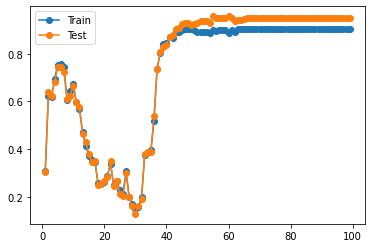

In [15]:
plt.plot(value,train_score, '-o', label = "Train")
plt.plot(value,test_score , '-o', label = 'Test')
plt.legend()
plt.show()